In [ ]:
import warnings
warnings.filterwarnings('ignore')

# On dataset D1:

1:K-means clustering on D1 using sklearn. Find best K using gridsearch over a suitable range (you pick the range). Plot your clustering results

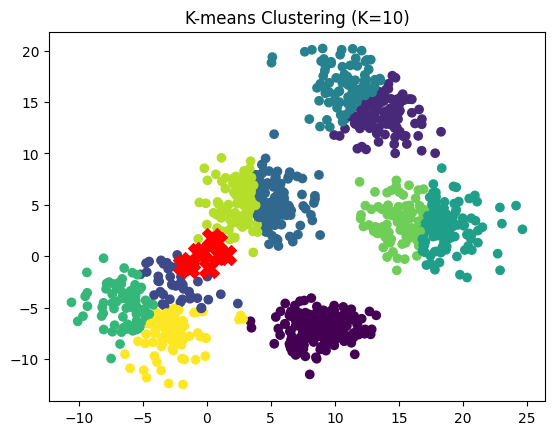

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


df = pd.read_csv('/content/size_1000_n_5_sepval_0.2.csv')


data = df[['x', 'y']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


k_range = range(2, 11)


param_grid = {'n_clusters': k_range}
kmeans = KMeans(random_state=42)
grid_search_kmeans = GridSearchCV(kmeans, param_grid, cv=5)
grid_search_kmeans.fit(scaled_data)


best_k = grid_search_kmeans.best_params_['n_clusters']


best_kmeans = KMeans(n_clusters=best_k, random_state=42)
labels_kmeans = best_kmeans.fit_predict(scaled_data)


plt.scatter(data['x'], data['y'], c=labels_kmeans, cmap='viridis')
plt.scatter(best_kmeans.cluster_centers_[:, 0], best_kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red')
plt.title(f'K-means Clustering (K={best_k})')
plt.show()



2:Run DBScan on D1 using sklearn. Figure out how to choose the hyperparameter settings. Or use gridsearch. (In the latter also, you will need to make some human decisions.) In either case, discuss your process in the report.

Ans:I've chosen a few values for eps and min_samples, and for each combination, I'm visualizing the clustering results.

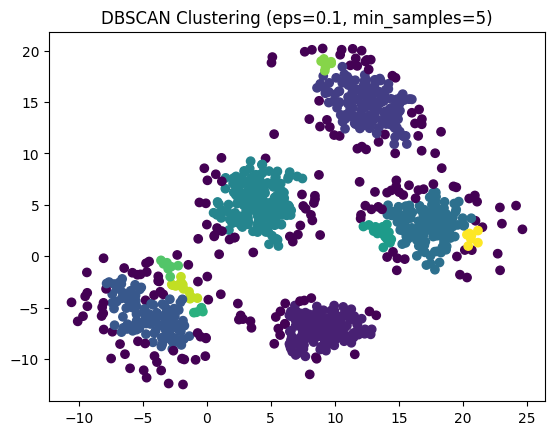

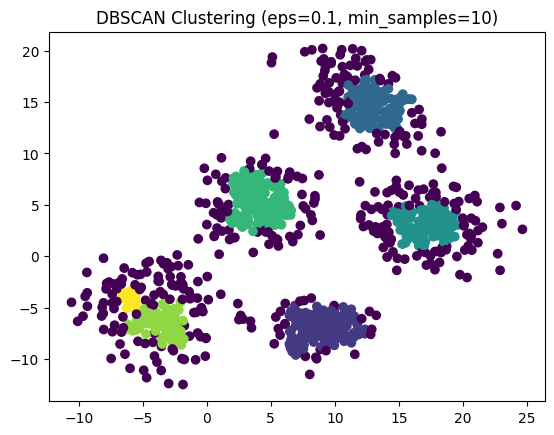

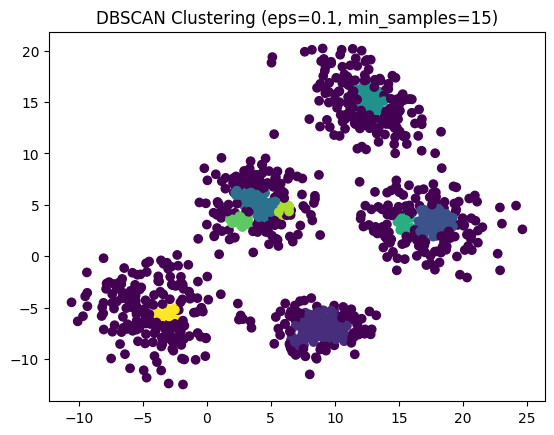

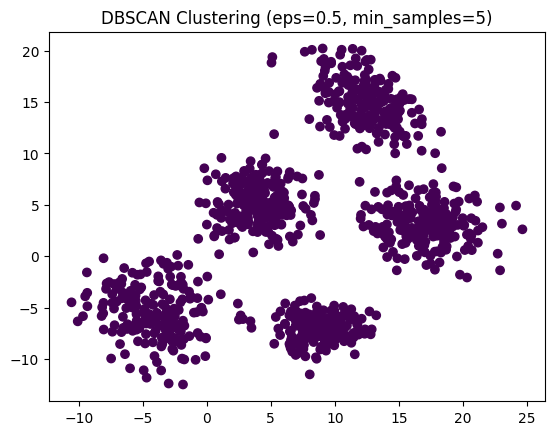

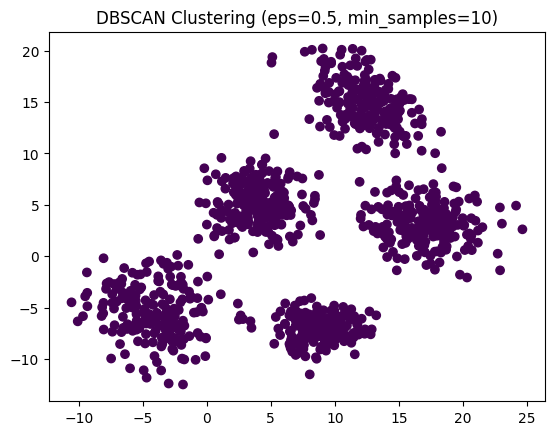

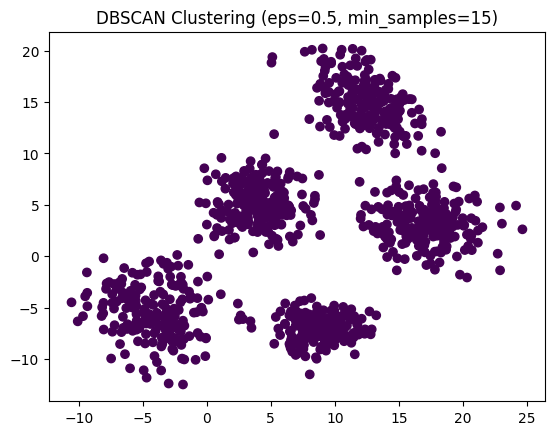

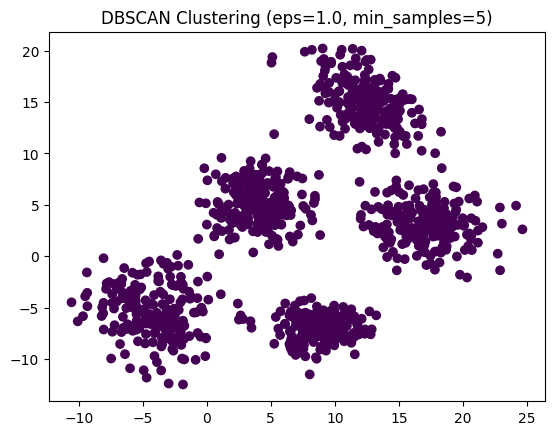

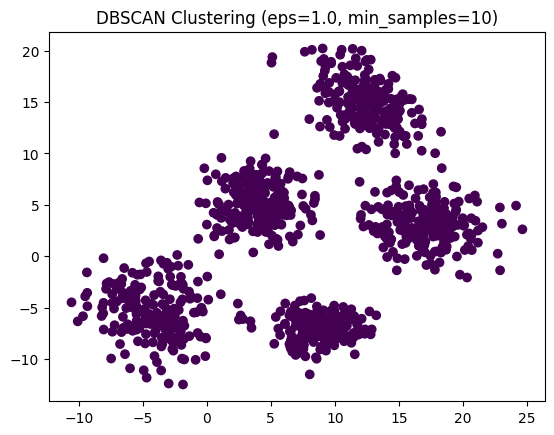

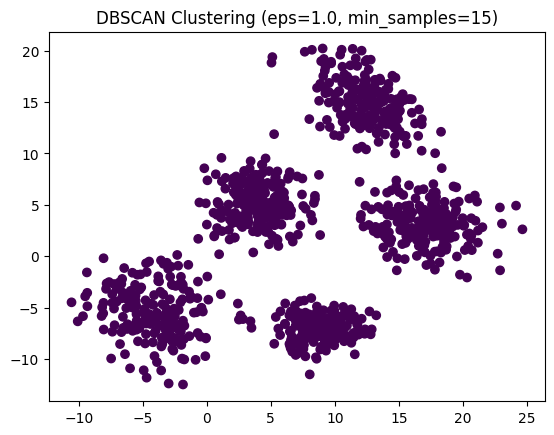

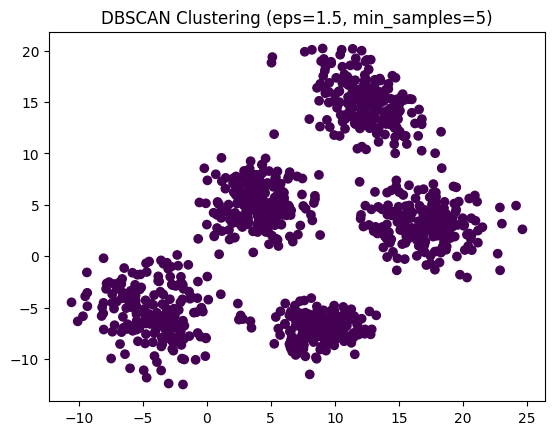

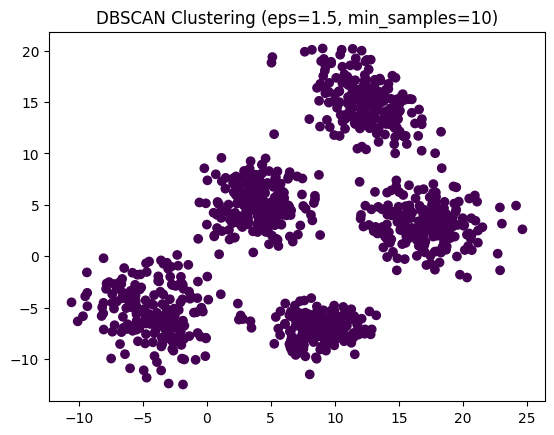

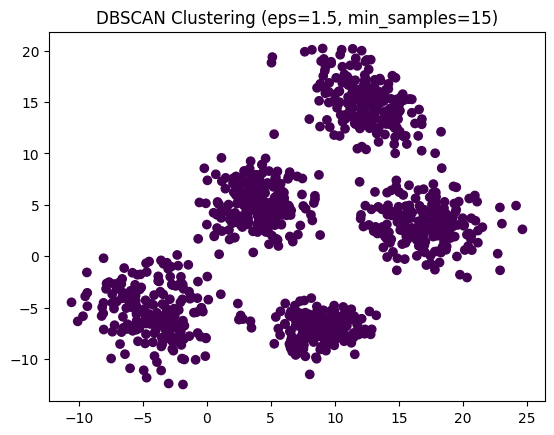

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/size_1000_n_5_sepval_0.2.csv')

# Extract the x and y columns
data = df[['x', 'y']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply DBSCAN with various hyperparameter settings
eps_values = [0.1, 0.5, 1.0, 1.5]  # You can adjust these values
min_samples_values = [5, 10, 15]  # You can adjust these values

# Use nested loops to try different combinations
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels_dbscan = dbscan.fit_predict(scaled_data)

        # Plot the clustering results
        plt.scatter(data['x'], data['y'], c=labels_dbscan, cmap='viridis')
        plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
        plt.show()


After plotting different combinatons of eps and min_samples value and thorugh visualization I found that eps of 0.2 and min_sample=3(Since its is reommended M>=D+1(where D is dimensions of Data)

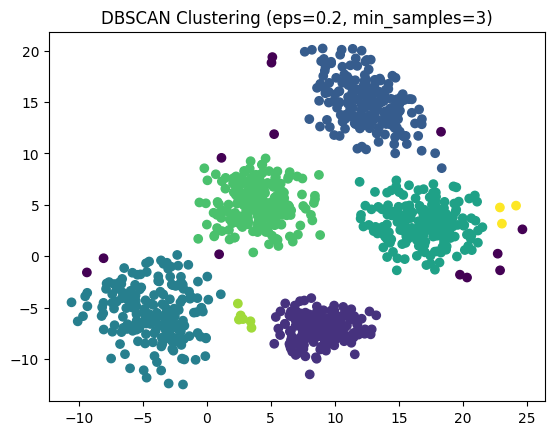

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/size_1000_n_5_sepval_0.2.csv')

# Extract the x and y columns
data = df[['x', 'y']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply DBSCAN with various hyperparameter settings
eps_values = [0.2]  # You can adjust these values
min_samples_values = [3]  # You can adjust these values

# Use nested loops to try different combinations
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels_dbscan = dbscan.fit_predict(scaled_data)

        # Plot the clustering results
        plt.scatter(data['x'], data['y'], c=labels_dbscan, cmap='viridis')
        plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
        plt.show()

3:Qualitatively compare the K-means clustering and the DBScan results.

Ans:Qualitatively comparing K-means clustering and DBSCAN results involves considering the characteristics of the clusters formed by each algorithm.

**K-means Clustering**

1.   Assumes clusters of spherical shapes.
2.   Requires specifying the number of clusters (K) beforehand.
3.   Sensitive to outliers as it assigns each point to the nearest centroid.



**DBSCAN:**
1. Doesn't require specifying the number of clusters.
2. Can discover clusters of arbitrary shapes and densities.
3. Robust to outliers, as they are treated as noise.

# 2: On dataset D2

1:Inject some noise into D2. In your report describe in a few sentences what you did.

Ans:I have injected noise by

**Generating Random Data:**
Generating random x and y coordinates within the range of the existing data in D2. The number of random points will determine the amount of noise.

**Combining with Original Data:**
Concatenate the randomly generated points with the original data in D2. This effectively introduces noise by adding points that don't conform to the underlying spiral structure.

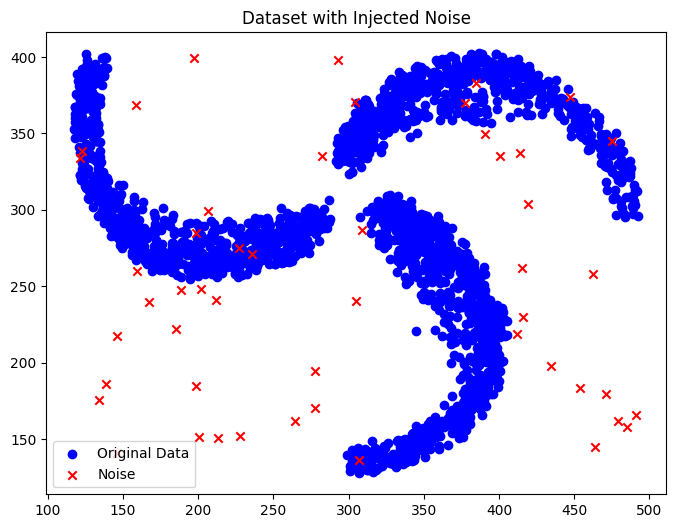

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/spirals.csv')


num_noise_points = 50

# Generate random x and y coordinates within the range of the original data
noise_x = np.random.uniform(df['x'].min(), df['x'].max(), num_noise_points)
noise_y = np.random.uniform(df['y'].min(), df['y'].max(), num_noise_points)

# Create a DataFrame for the noise
noise_data = pd.DataFrame({'x': noise_x, 'y': noise_y})

# Concatenate the original data with the noise data
noisy_df = pd.concat([df, noise_data], ignore_index=True)


plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], c='blue', label='Original Data')
plt.scatter(noise_data['x'], noise_data['y'], c='red', marker='x', label='Noise')
plt.title('Dataset with Injected Noise')
plt.legend()
plt.show()


2:Inject two round clusters into D2. In your report explain in a few sentences what you did.

Ans:I have injected two round clusters

**Generating Circular Clusters:**
Generating random points that form two circular clusters. I have use functions like np.random.uniform to generate points within a specified radius and angle, ensuring that they create round clusters.

**Combine with Original Data:**
Concatenate the points representing the circular clusters with the original data in D2.

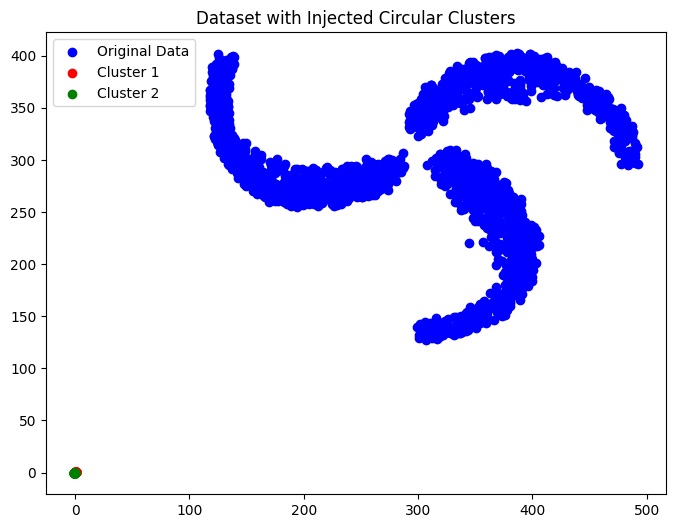

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('/content/spirals.csv')


radius = 0.2
angle1 = np.linspace(0, 2 * np.pi, 100)
angle2 = np.linspace(0, 2 * np.pi, 100)


cluster1_x = radius * np.cos(angle1) + 0.5
cluster1_y = radius * np.sin(angle1) + 0.5

cluster2_x = radius * np.cos(angle2) - 0.5
cluster2_y = radius * np.sin(angle2) - 0.5


cluster1_data = pd.DataFrame({'x': cluster1_x, 'y': cluster1_y})
cluster2_data = pd.DataFrame({'x': cluster2_x, 'y': cluster2_y})


modified_df = pd.concat([df, cluster1_data, cluster2_data], ignore_index=True)
modified_df.to_csv("modified_dataset.csv")

# Visualize the original and modified datasets
plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], c='blue', label='Original Data')
plt.scatter(cluster1_data['x'], cluster1_data['y'], c='red', marker='o', label='Cluster 1')
plt.scatter(cluster2_data['x'], cluster2_data['y'], c='green', marker='o', label='Cluster 2')
plt.title('Dataset with Injected Circular Clusters')
plt.legend()
plt.show()


3:K-means clustering on the resulting dataset as in D1.1 (gridsearch; plot and discuss the results).

Ans:The code performs grid search over a range of K values, determines the best K, and then applies K-means clustering with the optimal K. The resulting clusters and centroids are visualized for analysis.

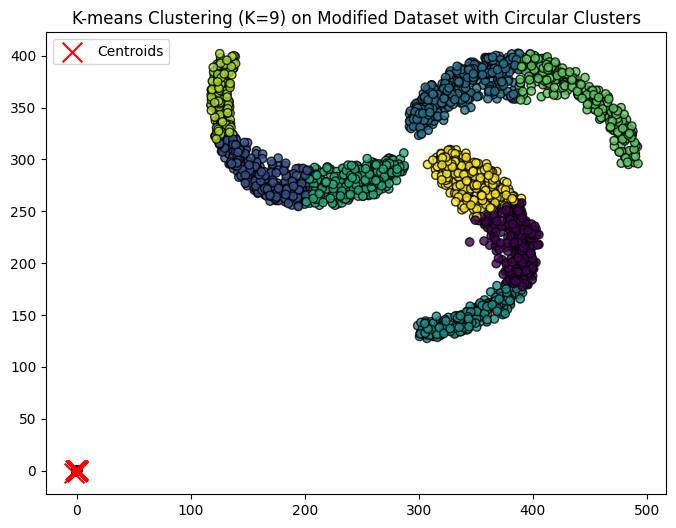

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV



data = modified_df[['x', 'y']]


scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


k_values = list(range(2, 10))

param_grid = {'n_clusters': k_values}
kmeans = KMeans(random_state=42)
grid_search_kmeans = GridSearchCV(kmeans, param_grid, cv=5)
grid_search_kmeans.fit(scaled_data)


best_k = grid_search_kmeans.best_params_['n_clusters']


kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(modified_df['x'], modified_df['y'], c=labels, cmap='viridis', alpha=0.8, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title(f'K-means Clustering (K={best_k}) on Modified Dataset with Circular Clusters')
plt.legend()
plt.show()


4:Run DBScan on the resulting dataset as in D1.1 (gridsearch or hyperparameter settings and explain; plot and discuss the results).

Ans:I have used custom function to calculate the silhouette score and use that as the scoring metric in the grid search

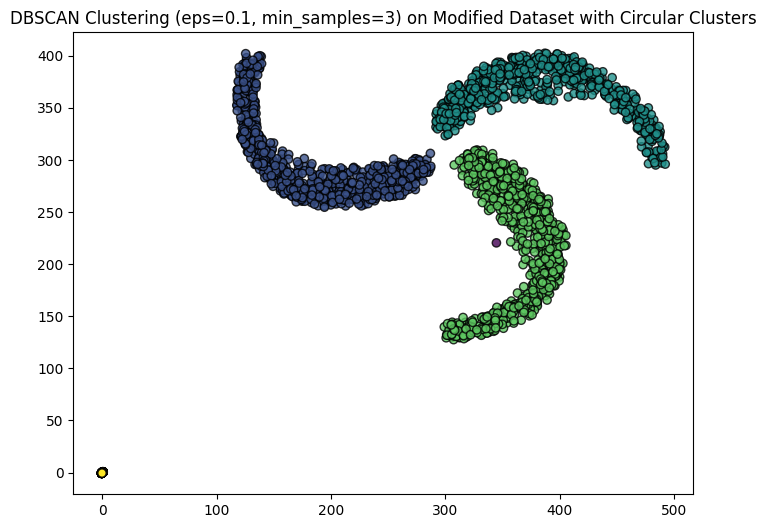

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score


modified_df = pd.read_csv('/content/modified_dataset.csv')


data = modified_df[['x', 'y']]


scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


param_grid = {'eps': [0.1], 'min_samples': [3]}

def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    if len(set(labels)) < 2:  # Silhouette score requires at least 2 clusters
        return 0.0
    return silhouette_score(X, labels)

# grid search using the custom silhouette scorer
dbscan = DBSCAN()
grid_search_dbscan = GridSearchCV(
    dbscan, param_grid, cv=5, scoring=silhouette_scorer, n_jobs=-1
)
grid_search_dbscan.fit(scaled_data)


best_eps = grid_search_dbscan.best_params_['eps']
best_min_samples = grid_search_dbscan.best_params_['min_samples']


dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels = dbscan.fit_predict(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(modified_df['x'], modified_df['y'], c=labels, cmap='viridis', alpha=0.8, edgecolors='k')
plt.title(f'DBSCAN Clustering (eps={best_eps}, min_samples={best_min_samples}) on Modified Dataset with Circular Clusters')
plt.show()


3:Qualitatively compare the K-means clustering and the DBScan results.

Ans:For spiral-shaped data, DBSCAN is often a more suitable choice due to its ability to identify clusters with arbitrary shapes and varying densities, characteristics commonly found in spiral patterns. K-means, designed for spherical clusters, might not capture the non-linear nature of spiral data as effectively.

**Handling Non-Linear Structures:**

**K-means:** Designed for linear separation, may not capture the intricate spiral patterns effectively.

**DBSCAN:** Well-suited for non-linear structures, like spirals. Can identify clusters based on density and connectivity.